In [40]:
import nltk # Natural Language Toolkit
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('omw-1.4')
nltk.download('punkt')
import pandas as pd
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
from wordcloud import WordCloud, STOPWORDS
import seaborn as sns
import matplotlib.pyplot as plt
import re # Regular Expression
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [2]:
file='/content/blogs.csv'
df=pd.read_csv(file,encoding='latin')
df

,Data,Labels
0,Path: cantaloupe.srv.cs.cmu.edu!magnesium.club...,alt.atheism
1,Newsgroups: alt.atheism\nPath: cantaloupe.srv....,alt.atheism
2,Path: cantaloupe.srv.cs.cmu.edu!das-news.harva...,alt.atheism
3,Path: cantaloupe.srv.cs.cmu.edu!magnesium.club...,alt.atheism
4,Xref: cantaloupe.srv.cs.cmu.edu alt.atheism:53...,alt.atheism
...,...,...
1995,Xref: cantaloupe.srv.cs.cmu.edu talk.abortion:...,talk.religion.misc
1996,Xref: cantaloupe.srv.cs.cmu.edu talk.religion....,talk.religion.misc
1997,Xref: cantaloupe.srv.cs.cmu.edu talk.origins:4...,talk.religion.misc
1998,Xref: cantaloupe.srv.cs.cmu.edu talk.religion....,talk.religion.misc


In [3]:
df.head()

,Data,Labels
0,Path: cantaloupe.srv.cs.cmu.edu!magnesium.club...,alt.atheism
1,Newsgroups: alt.atheism\nPath: cantaloupe.srv....,alt.atheism
2,Path: cantaloupe.srv.cs.cmu.edu!das-news.harva...,alt.atheism
3,Path: cantaloupe.srv.cs.cmu.edu!magnesium.club...,alt.atheism
4,Xref: cantaloupe.srv.cs.cmu.edu alt.atheism:53...,alt.atheism


In [4]:
df.tail()

,Data,Labels
1995,Xref: cantaloupe.srv.cs.cmu.edu talk.abortion:...,talk.religion.misc
1996,Xref: cantaloupe.srv.cs.cmu.edu talk.religion....,talk.religion.misc
1997,Xref: cantaloupe.srv.cs.cmu.edu talk.origins:4...,talk.religion.misc
1998,Xref: cantaloupe.srv.cs.cmu.edu talk.religion....,talk.religion.misc
1999,Xref: cantaloupe.srv.cs.cmu.edu sci.skeptic:43...,talk.religion.misc


In [5]:
df.describe()

,Data,Labels
count,2000,2000
unique,2000,20
top,Path: cantaloupe.srv.cs.cmu.edu!magnesium.club...,alt.atheism
freq,1,100


In [6]:
df.shape

(2000, 2)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Data    2000 non-null   object
 1   Labels  2000 non-null   object
dtypes: object(2)
memory usage: 31.4+ KB


In [8]:
df['Labels'].value_counts()

,count
Labels,
alt.atheism,100
comp.graphics,100
talk.politics.misc,100
talk.politics.mideast,100
talk.politics.guns,100
soc.religion.christian,100
sci.space,100
sci.med,100
sci.electronics,100


In [18]:
print(df.columns)

Index(['Data', 'Labels'], dtype='object')


Preprocesssing & EDA

In [42]:
df['Labels'] = df['Labels'].str.lower() #coverts into lowecase
df.head()

,text,Labels
0,Path: cantaloupe.srv.cs.cmu.edu!magnesium.club...,alt.atheism
1,Newsgroups: alt.atheism\nPath: cantaloupe.srv....,alt.atheism
2,Path: cantaloupe.srv.cs.cmu.edu!das-news.harva...,alt.atheism
3,Path: cantaloupe.srv.cs.cmu.edu!magnesium.club...,alt.atheism
4,Xref: cantaloupe.srv.cs.cmu.edu alt.atheism:53...,alt.atheism


In [43]:
# Function to remove HTML Tags
def remove_html_tags(text):
    pattern = re.compile('<.*?>')
    return pattern.sub(r'', text)

In [47]:
df['Labels'] = df['Labels'].apply(remove_html_tags)

In [48]:
#removing punctuations
import string
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [49]:
punc = string.punctuation

In [50]:
def remove_punc(text):
    return text.translate(str.maketrans('', '', punc))

In [52]:
remove_punc(df['Labels'][9])

'altatheism'

In [53]:
#stopwords handling
from nltk.corpus import stopwords
stopword = stopwords.words('english')

In [58]:
def remove_stopwords(text):
    new_text = []

    for word in text.split():
        if word in stopword:
            new_text.append('')
        else:
            new_text.append(word)
    x = new_text[:]
    new_text.clear()
    return " ".join(x)

In [62]:
remove_stopwords(df['Labels'][9])
df['Labels'].apply(remove_stopwords)

,Labels
0,alt.atheism
1,alt.atheism
2,alt.atheism
3,alt.atheism
4,alt.atheism
...,...
1995,talk.religion.misc
1996,talk.religion.misc
1997,talk.religion.misc
1998,talk.religion.misc


In [64]:
#tokenization
from nltk.tokenize import word_tokenize,sent_tokenize
word_tokenize(df['Labels'][5])

['alt.atheism']

Train test

In [114]:
#Vectorize the text data
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(df['text'])  # Create a sparse matrix

In [117]:
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(df['text'])

In [118]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Model building

In [119]:
from sklearn.naive_bayes import MultinomialNB
model = MultinomialNB()
model.fit(X_train, y_train)

MultinomialNB()

In [120]:
y_pred = model.predict(X_test)

In [127]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.0


In [124]:
# Check unique classes in y_test and y_pred
unique_classes = label_encoder.classes_  # All unique classes in the original dataset
print("Unique classes in y_test:", set(y_test))
print("Unique classes in y_pred:", set(y_pred))

Unique classes in y_test: {10, 11, 15, 18, 24, 30, 35, 38, 39, 43, 46, 49, 54, 64, 65, 69, 79, 82, 83, 84, 88, 92, 99, 100, 112, 113, 114, 119, 120, 126, 128, 137, 138, 139, 142, 147, 152, 167, 168, 177, 181, 183, 185, 188, 190, 192, 197, 201, 215, 216, 217, 218, 223, 226, 229, 230, 234, 240, 241, 245, 251, 255, 260, 266, 272, 276, 289, 290, 300, 307, 308, 310, 311, 336, 338, 344, 348, 349, 358, 360, 363, 370, 371, 373, 377, 385, 390, 393, 398, 406, 414, 417, 418, 424, 428, 438, 452, 455, 459, 460, 470, 479, 483, 490, 502, 507, 511, 513, 529, 530, 531, 538, 539, 541, 544, 557, 560, 562, 565, 569, 570, 573, 580, 583, 584, 592, 599, 605, 610, 613, 614, 622, 630, 635, 637, 640, 645, 646, 647, 658, 661, 680, 693, 694, 701, 704, 709, 715, 717, 718, 723, 733, 736, 740, 744, 753, 754, 756, 757, 775, 778, 780, 782, 785, 786, 790, 806, 811, 812, 813, 817, 821, 827, 834, 839, 845, 848, 862, 871, 877, 881, 886, 891, 895, 896, 900, 920, 928, 934, 936, 939, 940, 941, 950, 951, 952, 953, 966, 971, 9

Sentiment Analysis

In [128]:
pip install pandas nltk textblob scikit-learn

In [129]:
import pandas as pd
from textblob import TextBlob
import nltk

In [130]:
# Function to analyze sentiment
def analyze_sentiment(text):
    analysis = TextBlob(text)

    return analysis.sentiment.polarity

In [131]:
df['sentiment'] = df['text'].apply(analyze_sentiment)

In [132]:
# Classify sentiment based on polarity
def classify_sentiment(polarity):
    if polarity > 0:
        return 'Positive'
    elif polarity < 0:
        return 'Negative'
    else:
        return 'Neutral'

In [133]:
df['sentiment_label'] = df['sentiment'].apply(classify_sentiment)

In [134]:
df

,text,Labels_alt.atheism,Labels_comp.graphics,Labels_comp.os.ms-windows.misc,Labels_comp.sys.ibm.pc.hardware,Labels_comp.sys.mac.hardware,Labels_comp.windows.x,Labels_misc.forsale,Labels_rec.autos,Labels_rec.motorcycles,...,Labels_sci.electronics,Labels_sci.med,Labels_sci.space,Labels_soc.religion.christian,Labels_talk.politics.guns,Labels_talk.politics.mideast,Labels_talk.politics.misc,Labels_talk.religion.misc,sentiment,sentiment_label
0,Path: cantaloupe.srv.cs.cmu.edu!magnesium.club...,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,0.072213,Positive
1,Newsgroups: alt.atheism\nPath: cantaloupe.srv....,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,-0.053757,Negative
2,Path: cantaloupe.srv.cs.cmu.edu!das-news.harva...,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,0.093119,Positive
3,Path: cantaloupe.srv.cs.cmu.edu!magnesium.club...,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,0.055008,Positive
4,Xref: cantaloupe.srv.cs.cmu.edu alt.atheism:53...,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,0.132183,Positive
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,Xref: cantaloupe.srv.cs.cmu.edu talk.abortion:...,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,0.024232,Positive
1996,Xref: cantaloupe.srv.cs.cmu.edu talk.religion....,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,0.153333,Positive
1997,Xref: cantaloupe.srv.cs.cmu.edu talk.origins:4...,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,0.120370,Positive
1998,Xref: cantaloupe.srv.cs.cmu.edu talk.religion....,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,0.111306,Positive


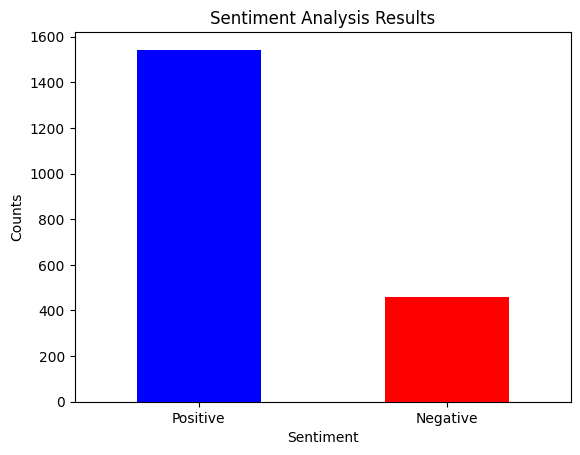

In [136]:
#Visualizing the results
import matplotlib.pyplot as plt

sentiment_counts = df['sentiment_label'].value_counts()
sentiment_counts.plot(kind='bar', color=['blue', 'red', 'gray'])
plt.title('Sentiment Analysis Results')
plt.xlabel('Sentiment')
plt.ylabel('Counts')
plt.xticks(rotation=0)
plt.show()

Evalution

In [137]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report

In [138]:
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

In [139]:
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

Accuracy: 0.0
Precision: 0.0
Recall: 0.0
F1 Score: 0.0


In [141]:
classification_rep = classification_report(y_test, y_pred)
print("Classification Report:\n", classification_rep)

Classification Report:
               precision    recall  f1-score   support

           5       0.00      0.00      0.00       0.0
           9       0.00      0.00      0.00       0.0
          10       0.00      0.00      0.00       1.0
          11       0.00      0.00      0.00       1.0
          12       0.00      0.00      0.00       0.0
          15       0.00      0.00      0.00       1.0
          16       0.00      0.00      0.00       0.0
          18       0.00      0.00      0.00       1.0
          24       0.00      0.00      0.00       1.0
          27       0.00      0.00      0.00       0.0
          30       0.00      0.00      0.00       1.0
          35       0.00      0.00      0.00       1.0
          37       0.00      0.00      0.00       0.0
          38       0.00      0.00      0.00       1.0
          39       0.00      0.00      0.00       1.0
          40       0.00      0.00      0.00       0.0
          43       0.00      0.00      0.00       1.0
   